In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [188]:
df = pd.read_csv('raw_data.csv')

In [189]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...","5,15 tỷ",100 m2,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...","4,1 tỷ",85 m2,_,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11 tỷ,67 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...","17,5 tỷ",137 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7 tỷ,90 m2,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Address      14941 non-null  object
 1   Prices       14941 non-null  object
 2   Area         14941 non-null  object
 3   toFace       14941 non-null  object
 4   type         14941 non-null  object
 5   certificate  14941 non-null  object
 6   width        14941 non-null  object
 7   length       14941 non-null  object
 8   floors       14941 non-null  object
dtypes: object(9)
memory usage: 1.0+ MB


## Clean Data

### Prices

- Loại bỏ chữ tỷ trong cột prices
- Thay thế dấu ',' trong cột Prices thành dấu '.'
- Những cột nào định dạng sai không phải là số thì chuyển thành NaN

In [191]:
df['Prices'] = df['Prices'].apply(lambda x: x.strip(' tỷ ').replace(' ', ''))
df['Prices'] = df['Prices'].apply(lambda x: x.replace(',', '.'))
df.loc[:,'Prices'] = pd.to_numeric(df['Prices'], errors='coerce')

In [192]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100 m2,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.1,85 m2,_,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.0,67 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.5,137 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.0,90 m2,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


### Area

- Xóa 'm2'
- Những biến Area nào không phải định dạng là số thì chuyển vè NaN

In [193]:
df['Area'] = df['Area'].apply(lambda x: x.strip(' m2 ').replace(' ', '').replace('KXĐ',''))
df.loc[:,'Area'] = pd.to_numeric(df['Area'], errors='coerce')

Những giá trị area nào bằng 0 thì chuyển về NaN

In [194]:
df.loc[df.Area==0,'Area']=np.nan

In [195]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.1,85.0,_,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.0,67.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.5,137.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.0,90.0,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


### toFace

In [196]:
df['toFace'].unique()

array(['Tây Nam', '_', 'Tây', 'Đông Nam', 'Đông', 'Tây Bắc', 'Bắc',
       'Đông Bắc', 'Nam'], dtype=object)

- Chuyển '_' về là 'Không'

In [197]:
df['toFace']=df['toFace'].apply(lambda x : x.replace('_', 'Không'))

In [198]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.1,85.0,Không,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.0,67.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.5,137.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.0,90.0,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


### Type

In [199]:
df['type'].unique()

array(['Nhà mặt tiền', 'Nhà trong hẻm'], dtype=object)

### Certificate

Các giá trị của biến Certificate

In [200]:
df['certificate'].unique()

array(['---', 'Sổ hồng/ Sổ đỏ', 'Giấy tờ hợp lệ'], dtype=object)

Thay đổi giá trị '---' thành 'Không có'

Thay đổi giá trị 'Giấy tờ hợp lệ' thành 'Sổ hồng/ Sổ đỏ'

In [201]:
df["certificate"] = df["certificate"].apply(lambda x: 'Không có' if x == "---" else 'Giấy tờ hợp lệ')

In [202]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.1,85.0,Không,Nhà mặt tiền,Không có,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.0,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.5,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.0,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5m,18m,4


### Width and Length

Loại bỏ các từ thừa

In [203]:
df['width'] = df['width'].apply(lambda x: x.strip(' m ').replace(' ', '').replace(',','.'))
df['width'] = df['width'].astype(str).apply(lambda x: re.sub(r'^\.', '', x)).apply(lambda x: re.sub(r'\D+', '.', x)).apply(lambda x: re.sub(r'\.$', '', x))

In [204]:
df['length'] = df['length'].apply(lambda x: x.strip(' m ').replace(' ', '').replace(',','.'))
df['length'] = df['length'].astype(str).apply(lambda x: re.sub(r'\.$', '', x)).apply(lambda x: re.sub(r'\.{2,}', '.', x))

Những giá trị không phải là số thì Chuyển thành NaN

In [205]:
df.loc[:,'width'] = pd.to_numeric(df['width'], errors='coerce')
df.loc[:,'length'] = pd.to_numeric(df['length'], errors='coerce')

Những giá trị length hoặc width nào bằng 0 thì chuyển thành NaN

In [206]:
df.loc[df.width==0,['width']]=np.nan
df.loc[df.length==0,['length']]=np.nan

In [207]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.1,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.0,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.5,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.0,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4


### Floors

Các giá trị của biến floors

In [208]:
df['floors'].unique()

array(['4', '1', '3', '2', '6', '---', '5', '8', '7', '10', '33', '9',
       '14', '11', '19', '34', '18', '123', '23', '15', '35', '25', '12',
       '17', '20', '28'], dtype=object)

Chuyển những giá trị '---' thành NaN

In [209]:
df.loc[:,'floors'] = pd.to_numeric(df['floors'], errors='coerce')

### Định dạng lại dữ liệu

In [210]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4.0
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.1,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1.0
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.0,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3.0
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.5,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3.0
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.0,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4.0


In [211]:
def convert(df, features,t):
    for feature in features:
        df[feature] = df[feature].astype(t)
features_int = ["floors"]
features_cat = ["type","certificate","toFace"]
features_float =["Prices","Area","width","length"]
convert(df,features_int,"Int64")
convert(df,features_cat,"category")
convert(df,features_float,"float64")

Trước khi định dạng

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Address      14941 non-null  object
 1   Prices       14941 non-null  object
 2   Area         14941 non-null  object
 3   toFace       14941 non-null  object
 4   type         14941 non-null  object
 5   certificate  14941 non-null  object
 6   width        14941 non-null  object
 7   length       14941 non-null  object
 8   floors       14941 non-null  object
dtypes: object(9)
memory usage: 1.0+ MB


In [213]:
data.describe()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
count,14941,14941,14941,14941,14941,14941,14941,14941,14941
unique,3037,834,392,9,2,3,321,377,26
top,"Đường Tiểu La, Phường Hòa Cường Bắc, Quận Hải...","4,5 tỷ",100 m2,_,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,---,3
freq,150,257,1666,9169,10412,11358,5613,4091,5684


Sau khi định dạng 

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Address      14941 non-null  object  
 1   Prices       14875 non-null  float64 
 2   Area         14791 non-null  float64 
 3   toFace       14941 non-null  category
 4   type         14941 non-null  category
 5   certificate  14941 non-null  category
 6   width        12876 non-null  float64 
 7   length       10830 non-null  float64 
 8   floors       14586 non-null  Int64   
dtypes: Int64(1), category(3), float64(4), object(1)
memory usage: 759.5+ KB


In [215]:
df.describe()

,Prices,Area,width,length,floors
count,14875.000000,14791.000000,12876.000000,10830.000000,14586.0
mean,8.378236,87.218493,5.711354,18.190815,2.744344
std,11.268677,63.940995,5.113937,27.314063,1.995086
min,1.000000,0.103000,2.000000,1.000000,1.0
25%,3.600000,60.000000,4.500000,14.000000,2.0
50%,5.250000,80.000000,5.000000,17.500000,3.0
75%,8.800000,100.000000,5.500000,20.000000,3.0
max,315.000000,950.000000,420.000000,2020.000000,123.0


## Create new Feature

Tách trường Address thành:
- Street (Đường)
- Ward (Phường-Xã)
- District (Quận - Huyện)
- City (Thành Phố)

In [216]:
df[['Street','Ward','District','City','','','']] = df['Address'].str.split(', ', expand=True)

Loại bỏ các trường "City", "Address" và sắp xếp lại thứ tự các trường

In [217]:
df = df.drop(['City', 'Address', ''], axis=1)
df = df[['Street','Ward','District', 'Prices', 'Area', 'toFace', 'type', 'certificate', 'width', 'length', 'floors']]
df.head()

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors
0,Đường Hà Mục,Phường Hòa Thọ Đông,Quận Cẩm Lệ,5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4
1,Đường Thi Sách,Phường Hòa Thuận Tây,Quận Hải Châu,4.10,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1
2,Đường Ông Ích Khiêm,Phường Tam Thuận,Quận Thanh Khê,11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3
3,Đường Núi Thành,Phường Hòa Cường Bắc,Quận Hải Châu,17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3
4,Đường Trương Văn Hiến,Phường Khuê Mỹ,Quận Ngũ Hành Sơn,7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4


Loại bỏ những giá trị không phải là quận, huyện ở Đà Nẵng 
    
('Quận Cẩm Lệ', 'Quận Hải Châu', 'Quận Thanh Khê', 'Quận Ngũ Hành Sơn', 'Quận Sơn Trà', 'Quận Liên Chiểu', 'Huyện Hòa Vang') 

In [218]:
df['District']= df['District'].str.lower()
District = ['quận cẩm lệ', 'quận hải châu', 'quận thanh khê',
       'quận ngũ hành sơn', 'quận sơn trà', 'quận liên chiểu','huyện hòa vang']
df = df.loc[df['District'].isin(District)]
df.loc[:,'District'] = df['District'].str.replace("quận ","")
df.loc[:,'District'] = df['District'].str.replace("huyện ","")

In [219]:
df.loc[:,'Ward'] = df['Ward'].str.replace("Phường ","")
df.loc[:,'Street'] = df['Street'].str.replace("Đường ","")

In [220]:
df['District'].unique()

array(['cẩm lệ', 'hải châu', 'thanh khê', 'ngũ hành sơn', 'sơn trà',
       'liên chiểu', 'hòa vang'], dtype=object)

## Mising Data

Thay thế giá trị trống của trường Prices, Area, floors bằng mean

In [221]:
df['Prices']=df['Prices'].fillna(df['Prices'].mean())
df['Area']=df['Area'].fillna(df['Area'].mean())
df['floors']=df['floors'].fillna(int(df['floors'].mean()))


Trường Width và Length

- Nếu giá trị width khác rỗng và length là rỗng thì: length = area/width
- Ngược lại thì: width = area/length
- Cả hai là rỗng thì length = width = area/2

In [222]:
df.loc[(df.width.isnull()) & (df.length.notnull()),['width']] = (df['Area'])/(df['length'])
df.loc[(df.width.notnull()) & (df.length.isnull()),['length']] = (df['Area'])/(df['width'])
df.loc[(df.width.isnull()) & (df.length.isnull()),['width','length']] = (df['Area'])/2

## Outlier

In [223]:
uppper_boundary=df['Prices'].mean() + 3* df['Prices'].std()
lower_boundary=df['Prices'].mean() - 3* df['Prices'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 42.29344192029161


In [224]:
df.loc[(df.Prices>uppper_boundary),'Prices'] = uppper_boundary

TypeError: Horizontal orientation requires numeric `x` variable.

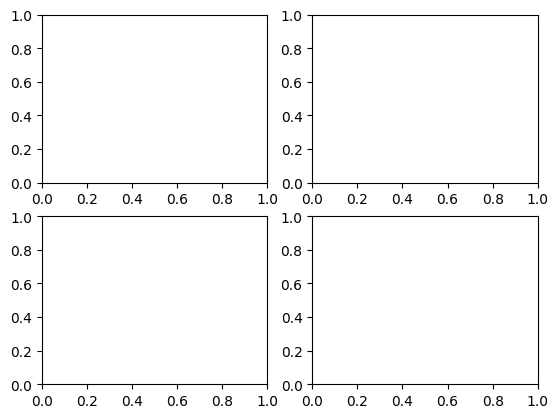

In [226]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(12,10))
sns.boxplot(data=data,x='Prices',ax=axes[0][0])
sns.boxplot(data=df,x='Prices',ax=axes[0][1])
sns.histplot(data=data,x='Prices',ax=axes[1][0])
sns.histplot(data=df,x='Prices',ax=axes[1][1])

In [ ]:
uppper_boundary=df['Area'].mean() + 3* df['Area'].std()
print("Biên trên:",uppper_boundary)

In [ ]:
df.loc[(df.Area>uppper_boundary),'Area'] = uppper_boundary

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.histplot(data=data,x='Area',ax=axes[0])
sns.histplot(data=df,x='Area',ax=axes[1])

In [ ]:
uppper_boundary=df['floors'].mean() + 3* df['floors'].std()
print("Biên trên:",uppper_boundary)

In [ ]:
df.loc[(df.floors>uppper_boundary),'floors']=int(uppper_boundary)

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='floors',ax=axes[0])
sns.boxplot(data=df,x='floors',ax=axes[1])

In [ ]:
uppper_boundary=df['width'].mean() + 3* df['width'].std()
print("Biên trên:",uppper_boundary)
df.loc[(df.width>uppper_boundary),'width'] = uppper_boundary

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='width',ax=axes[0])
sns.boxplot(data=df,x='width',ax=axes[1])

In [ ]:
uppper_boundary=df['length'].mean() + 3* df['length'].std()
print("Biên trên:",uppper_boundary)
df.loc[(df.length>uppper_boundary),'length'] = uppper_boundary

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='length',ax=axes[0])
sns.boxplot(data=df,x='length',ax=axes[1])